## Лабораторная Работа номер 2:  Приближённое  решение уравнения  вида  f(x) = 0  итерационными  методами:  простой итерации, секущих и касательных (комбинированный метод) 
### Вариант 19: 2*sin(x + 0.5) = 1.5 - x

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DxDyBoss\AppData\Local\Temp\ipykernel_2528\3801827942.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')


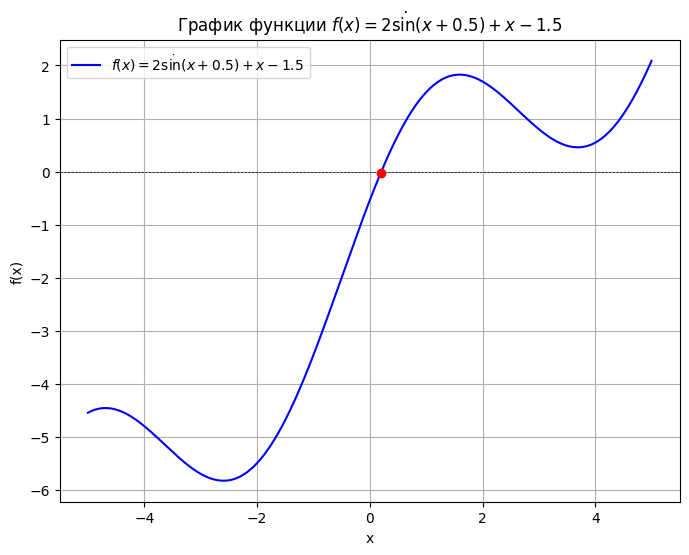

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Создаем массив значений x
x = np.linspace(-5, 5, 500)

# Вычисляем значения функции
y = f(x)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$', color='blue')

# Добавляем горизонтальную линию y=0 для наглядности
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Находим приближенные точки пересечения с осью x
zero_crossings = np.where(np.diff(np.sign(y)))[0]
for crossing in zero_crossings:
    plt.plot(x[crossing], y[crossing], 'ro')  # Отмечаем точки пересечения красными точками

# Добавляем легенду, сетку и заголовок
plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

In [5]:
import numpy as np

# Определяем функцию g(x) для метода простой итерации
def g(x):
    return 1.5 - 2 * np.sin(x + 0.5)

# Определяем производную функции g(x)
def g_derivative(x):
    return -2 * np.cos(x + 0.5)

# Проверка условия сходимости
def check_convergence(a, b):
    """
    Проверяет условие сходимости метода простой итерации: |g'(x)| < 1.

    :param a: Начало интервала
    :param b: Конец интервала
    :return: True, если условие сходимости выполнено, иначе False
    """
    # Создаем массив значений x в интервале [a, b]
    x_values = np.linspace(a, b, 500)
    # Вычисляем значения производной |g'(x)| для всех x в интервале
    derivative_values = np.abs(g_derivative(x_values))
    max_derivative = np.max(derivative_values)  # Находим максимальное значение |g'(x)|

    if max_derivative >= 1:
        print("Проверка на условие сходимости не пройдена.")
        print(f"Максимальное значение |g'(x)| в интервале [{a}, {b}] равно {max_derivative:.4f}.")
        print("Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.")
        print("Поскольку |g'(x)| >= 1, метод может расходиться.")
        print("Рекомендуется использовать другой метод, например, метод из первой лабораторной работы.")
        return False
    else:
        print("Проверка на условие сходимости пройдена.")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=1000):
    """
    Находит корень уравнения методом простой итерации.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :param max_iter: Максимальное количество итераций
    :return: Приближенное значение корня
    """
    # Проверка условия сходимости
    if not check_convergence(a, b):
        return None

    # Выбираем начальное приближение как середину интервала
    x_prev = (a + b) / 2

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'x_prev':<15}{'x_next':<15}{'|x_next - x_prev|':<20}")
    print("-" * 65)

    iteration = 0
    while iteration < max_iter:
        x_next = g(x_prev)  # Вычисляем следующее приближение
        diff = abs(x_next - x_prev)  # Разница между текущим и предыдущим значением

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{x_prev:<15.{precision_digits}f}{x_next:<15.{precision_digits}f}{diff:<20.{precision_digits}f}")

        if diff < tol:  # Проверяем условие выхода
            print(f"\nКорень найден: {x_next:.{precision_digits}f}")
            return x_next

        x_prev = x_next  # Обновляем предыдущее значение
        iteration += 1

    print("\nМетод не сошелся за максимальное количество итераций.")
    return None

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = simple_iteration(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Проверка на условие сходимости не пройдена.
Максимальное значение |g'(x)| в интервале [0.0, 1.0] равно 1.7552.
Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.
Поскольку |g'(x)| >= 1, метод может расходиться.
Рекомендуется использовать другой метод, например, метод половинного деления или метод Ньютона.


In [6]:
import numpy as np

# Определяем новую функцию g(x) для метода простой итерации
def g(x):
    return np.arcsin((1.5 - x) / 2) - 0.5

# Определяем производную функции g(x)
def g_derivative(x):
    return 1 / (2 * np.sqrt(1 - ((1.5 - x) / 2)**2))

# Проверка условия сходимости
def check_convergence(a, b):
    """
    Проверяет условие сходимости метода простой итерации: |g'(x)| < 1.

    :param a: Начало интервала
    :param b: Конец интервала
    :return: True, если условие сходимости выполнено, иначе False
    """
    # Создаем массив значений x в интервале [a, b]
    x_values = np.linspace(a, b, 500)
    # Вычисляем значения производной |g'(x)| для всех x в интервале
    derivative_values = np.abs(g_derivative(x_values))
    max_derivative = np.max(derivative_values)  # Находим максимальное значение |g'(x)|

    if max_derivative >= 1:
        print("Проверка на условие сходимости не пройдена.")
        print(f"Максимальное значение |g'(x)| в интервале [{a}, {b}] равно {max_derivative:.4f}.")
        print("Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.")
        print("Поскольку |g'(x)| >= 1, метод может расходиться.")
        print("Рекомендуется использовать другой метод, например, метод половинного деления или метод Ньютона.")
        return False
    else:
        print("Проверка на условие сходимости пройдена.")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=1000):
    """
    Находит корень уравнения методом простой итерации.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :param max_iter: Максимальное количество итераций
    :return: Приближенное значение корня
    """
    # Проверка условия сходимости
    if not check_convergence(a, b):
        return None

    # Выбираем начальное приближение как середину интервала
    x_prev = (a + b) / 2

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'x_prev':<15}{'x_next':<15}{'|x_next - x_prev|':<20}")
    print("-" * 65)

    iteration = 0
    while iteration < max_iter:
        x_next = g(x_prev)  # Вычисляем следующее приближение
        diff = abs(x_next - x_prev)  # Разница между текущим и предыдущим значением

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{x_prev:<15.{precision_digits}f}{x_next:<15.{precision_digits}f}{diff:<20.{precision_digits}f}")

        if diff < tol:  # Проверяем условие выхода
            print(f"\nКорень найден: {x_next:.{precision_digits}f}")
            return x_next

        x_prev = x_next  # Обновляем предыдущее значение
        iteration += 1

    print("\nМетод не сошелся за максимальное количество итераций.")
    return None

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = simple_iteration(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Проверка на условие сходимости пройдена.
Итерация  x_prev         x_next         |x_next - x_prev|   
-----------------------------------------------------------------
0         0.500          0.024          0.476               
1         0.024          0.330          0.307               
2         0.330          0.125          0.206               
3         0.125          0.258          0.134               
4         0.258          0.170          0.088               
5         0.170          0.228          0.058               
6         0.228          0.190          0.038               
7         0.190          0.214          0.025               
8         0.214          0.198          0.016               
9         0.198          0.209          0.011               
10        0.209          0.202          0.007               
11        0.202          0.206          0.005               
12        0.206          0.203          0.003               
13        0.203          0.205         

## Метод секущих и касательных

Начинаем комбинированный метод хорд и касательных:
Итерация 0: a = 0.265772, b = -0.309701, |b - a| = 0.575473


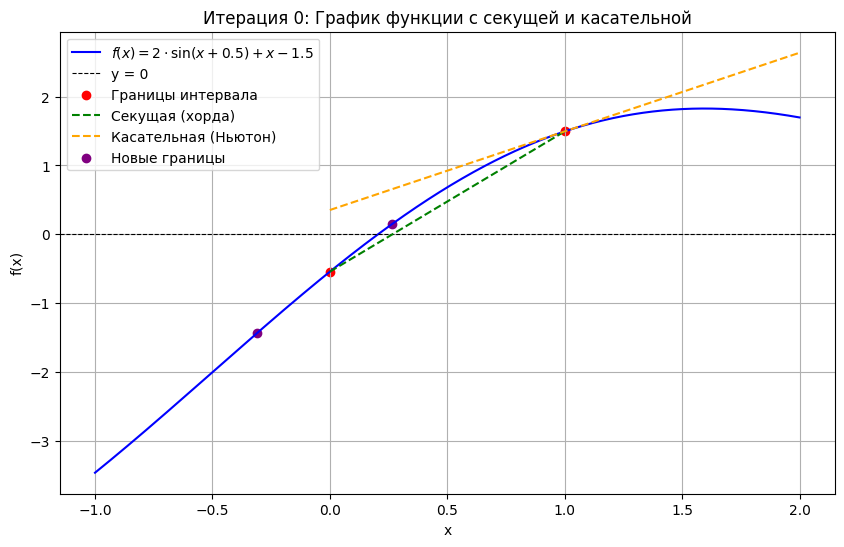

Итерация 1: a = 0.210542, b = 0.173243, |b - a| = 0.037299


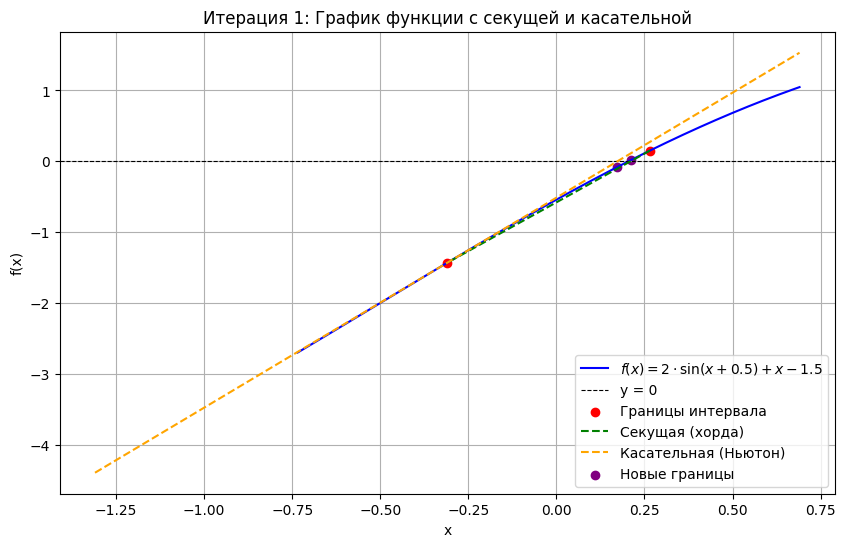

Итерация 2: a = 0.204624, b = 0.204335, |b - a| = 0.000289


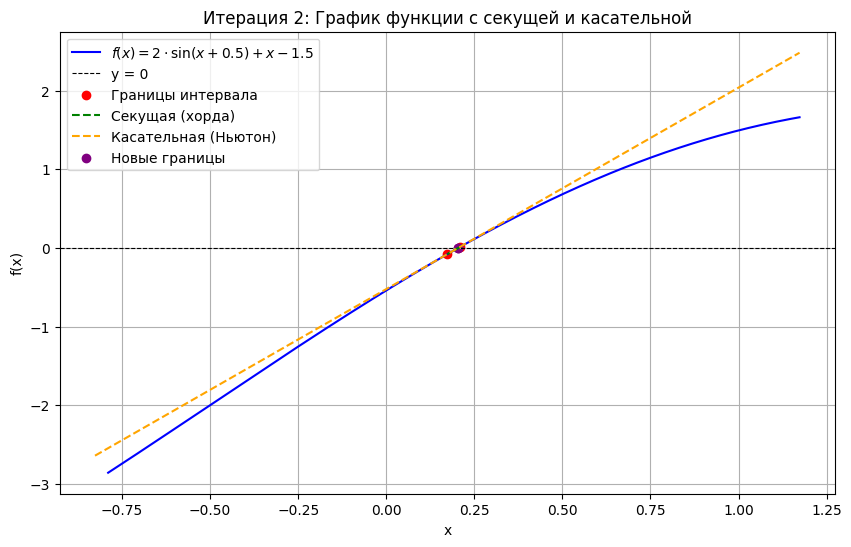


Корень уравнения: 0.204480


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x)
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Определяем производную функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Функция для построения графика на каждой итерации
def plot_iteration(a, b, a_new, b_new, iteration):
    """
    Строит график функции f(x) с текущими границами интервала,
    секущей (метод хорд) и касательной (метод Ньютона).

    :param a: Текущая левая граница
    :param b: Текущая правая граница
    :param a_new: Новая левая граница (метод хорд)
    :param b_new: Новая правая граница (метод Ньютона)
    :param iteration: Номер итерации
    """
    x = np.linspace(a - 1, b + 1, 500)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$f(x) = 2 \cdot \sin(x + 0.5) + x - 1.5$", color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y = 0")

    # Отображаем текущие границы интервала
    plt.scatter([a, b], [f(a), f(b)], color="red", label="Границы интервала")
    
    # Отображаем секущую (метод хорд)
    plt.plot([a, b], [f(a), f(b)], color="green", linestyle="--", label="Секущая (хорда)")
    
    # Отображаем касательную (метод Ньютона)
    tangent_x = np.linspace(b - 1, b + 1, 100)
    tangent_y = f(b) + df(b) * (tangent_x - b)
    plt.plot(tangent_x, tangent_y, color="orange", linestyle="--", label="Касательная (Ньютон)")

    # Отображаем новые границы интервала
    plt.scatter([a_new, b_new], [f(a_new), f(b_new)], color="purple", label="Новые границы")

    plt.title(f"Итерация {iteration}: График функции с секущей и касательной")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Комбинированный метод хорд и касательных
def combined_method(a, b, tol):
    """
    Комбинированный метод хорд и касательных.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :return: Приближенное значение корня
    """
    # Проверка изменения знака
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b].")

    # Проверка производной
    if df(a) == 0 or df(b) == 0:
        raise ValueError("Производная равна нулю на границах интервала.")

    print("Начинаем комбинированный метод хорд и касательных:")
    iteration = 0
    while abs(b - a) > tol:
        # Метод хорд (обновление левой границы)
        a_new = a - f(a) * (b - a) / (f(b) - f(a))
        
        # Метод касательных (обновление правой границы)
        b_new = b - f(b) / df(b)
        
        # Вывод отчета по текущей итерации
        print(f"Итерация {iteration}: a = {a_new:.6f}, b = {b_new:.6f}, |b - a| = {abs(b_new - a_new):.6f}")
        
        # Строим график для текущей итерации
        plot_iteration(a, b, a_new, b_new, iteration)
        
        # Обновляем границы интервала
        a, b = a_new, b_new
        iteration += 1

    # Возвращаем среднее значение между границами как корень
    root = (a + b) / 2
    return root

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = combined_method(a, b, tol)
    print(f"\nКорень уравнения: {root:.6f}")
except ValueError as e:
    print(f"Ошибка: {e}")